# DNN基礎入門
實作一個超簡單的全Dense神經網路！

### 規則
* 0 <= `input` <= 3
* 當`input`>=2，`output`為1
* 當`input`< 2，`output`為0

# Import

In [ ]:
# 最基本的幾個套件，基本上一定要import
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

# 跟「繪圖」有關的套件，如果沒有打算繪圖就不用 import
%matplotlib inline
import matplotlib.pyplot as plt


# 跟「設計模型」有關的套件，如果沒有要設計或是修改模型的話就不用 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D

# 跟「編譯(compile)模型」有關的套件
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

# 跟「混淆矩陣(confusion matrix)」有關的套件
from sklearn.metrics import confusion_matrix
import itertools


# 好用的函式

## show_train_history( train_history )


* 用途：繪製 accuracy 和 loss 的曲線，可以用來比較 train set 和
 validation set 的差距（如果 train set 的 accuracy 遠高於 validation set，就表示有overfitting 的情況）
 
* 參數：
  * `train_history`：直接把 `model.fit()` 回傳的 `train_history` 丟進來就可以顯示了
  * 任何 Keras Sequential 的模型都能用這個函數

In [ ]:
def show_train_history(train_history):

  fig , ax = plt.subplots()
  fig.subplots_adjust(hspace=0.4, wspace=0.4) #設定子圖的間隔
  fig.set_figwidth(14)

  ax1 = plt.subplot(1, 2, 1)
  plt.title("Accuracy")
  plt.plot(train_history.history['accuracy'],'-', label='accuracy')
  plt.plot(train_history.history['val_accuracy'],'-',  label='val_accuracy')
  leg = ax1.legend(loc='lower right') 
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')


  ax2 = plt.subplot(1, 2, 2)
  plt.title("Loss")
  plt.plot(train_history.history['loss'],'-', label='loss')
  plt.plot(train_history.history['val_loss'],'-', label='val_loss')
  leg = ax2.legend(loc='upper right') 
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.show()

# 產生訓練集


* 訓練集(train set)有1000筆數據
* 驗證集(test set)有200筆數據
* 訓練集和驗證集產生的方式是一樣的，只有數量不同

## 產生訓練集的規則

1. 創建兩個空的`list`分別命名為：
  * `x_train`: sample
  * `y_train`: label
2. 進行一個1000次的`for`迴圈
  * 隨機從0~3之中選出一個數字
    * Hint: `number = random.randint(0,3)`
  * 如果抽出的數字為`i`，則`x_train`要新增一個長度為4，第`i`個元素為1，其他元素為0的陣列
    * Hint1: `x_train.append([0,0,1,0])`
    * Hint2: 
      ```
      3 => [0,0,0,1]
      0 => [1,0,0,0]
      1 => [0,1,0,0]
      ```

  * 同時`y_train`也要新增一個長度為2的陣列
    * 若抽出的數字為2,3：
      * 要新增[0,1]
    * 若抽出的數字為0,1：
      * 要新增[1,0]

## 產生驗證集的規則
和產生訓練集的規則一樣，但是全部的`train`都要變成`test`
* e.g. `x_test`, `y_test`

## 成果
如果您成功完成這段程式碼，最後print出來的結果應該會類似（順序會不太一樣）：
  ```
  #0: x = [0, 1, 0, 0]  y = [1, 0]
  #1: x = [1, 0, 0, 0]  y = [1, 0]
  #2: x = [0, 0, 1, 0]  y = [0, 1]
  #3: x = [0, 0, 1, 0]  y = [0, 1]
  #4: x = [1, 0, 0, 0]  y = [1, 0]
  #5: x = [0, 0, 1, 0]  y = [0, 1]
  #6: x = [0, 1, 0, 0]  y = [1, 0]
  ...
  ```


In [ ]:
x_train=[] # sample 訓練集
y_train=[] # label 訓練集
for i in range(1000):
  # TODO1 START

  # TODO1 END
  print('#' + str(i) +': x = ' + str(x_train[i])+'  y = '+str(y_train[i]))


In [ ]:
x_test=[] # sample 驗證集
y_test=[] # label 驗證集
for i in range(200):
  # TODO2 START

  # TODO2 END
  print('#' + str(i) +': x = ' + str(x_test[i])+'  y = '+str(y_test[i]))


把`x_train`、`y_train`、`x_test`、`y_test`轉換成numpy array

---



In [ ]:
  # TODO3 START

  # TODO3 END

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1000, 4)
(1000, 2)
(200, 4)
(200, 2)


# 開始建立模型

試試看自己疊模型，可以參考之前的 Keras Basic 檔案

In [2]:
model = Sequential([
    # TODO4 START

    # TODO4 END
])

NameError: ignored

試試看把最後一層的`activation`從`softmax`改成`relu`進行訓練會發生什麼事？

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 8         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


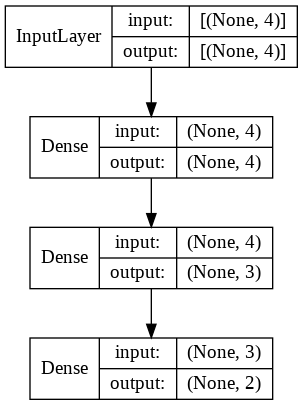

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes = True,
    show_layer_names = False
)

試試看如果把`learning_rate`改成`0.0001`會發生什麼事？（記得要把model這個變數清空再重新訓練喔！）

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型

使用`fit`函數開始訓練模型，我們將`validation_split`設為`0.2`，也就是說有20%的資料會被拿來測試模型的預測準確度`val_accuracy`。<br/><br/>
**如果模型發生overfit，`val_accuracy`會比`accuracy`低很多。**
<br/><br/>
另外我們把訓練過程存在 `train_history` 這個變數裡面，可以記錄訓練情況。

In [1]:
train_history = model.fit(x= x_train, y= y_train, epochs=30, validation_split=0.2, batch_size=128, verbose=1) 

NameError: ignored

把訓練情況畫出來！

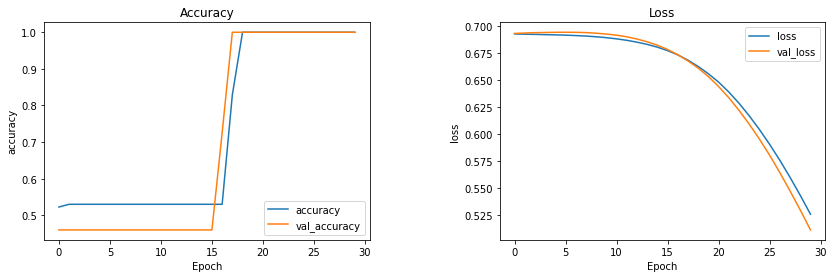

In [ ]:
show_train_history(train_history)

# 測試模型

我們要使用 x_test 和 y_test 來測試模型，因為這些資料並不是剛剛訓練時使用的資料，因此我們可以確認模型並不是直接把答案背起來，而是真正掌握到數據的特徵。

In [ ]:
score = model.evaluate(x_test, y_test)
print('測試分數：', score[0])
print('測試準確率：', score[1]*100, '%')

7/7 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 1.0000
測試分數： 0.5114327073097229
測試準確率： 100.0 %


In [ ]:
model.predict(np.array([[1,0,0,0]]),verbose=1)

1/1 [==============================] - 0s 54ms/step


array([[0.59274596, 0.407254  ]], dtype=float32)

In [ ]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.23516637, -0.24058938],
        [ 0.1877327 , -0.15467952],
        [-0.3374891 ,  0.2888199 ],
        [-0.13653404,  0.18759191]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.06273124, -0.06273123], dtype=float32)>]